<a href="https://colab.research.google.com/github/arman-hossain45/ML_Algorithm/blob/main/final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import  SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#model selection

from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# load the data set

In [121]:
df=pd.read_csv("diabetics.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [122]:
!pip install ydata-profiling

In [123]:
from ydata_profiling import ProfileReport

profile = ProfileReport( df , title="Diabetics prediction", explorative = True  )

profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 125.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [124]:
df.shape

(768, 9)

In [125]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [127]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [128]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

There is no categorical column in this data set

In [129]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

separate X and Y

In [130]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [131]:
corr=df.select_dtypes(include=np.number).corr()['Outcome'].sort_values(ascending=False)
corr

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


<Axes: >

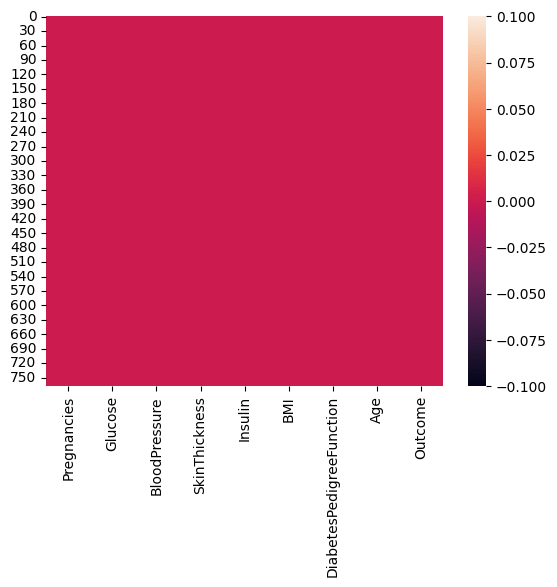

In [132]:
sns.heatmap(df.isnull())

# There is no null value in this data set

In [133]:
#Numerical feature


numeric_feature=x.select_dtypes(include=['int64','float64']).columns

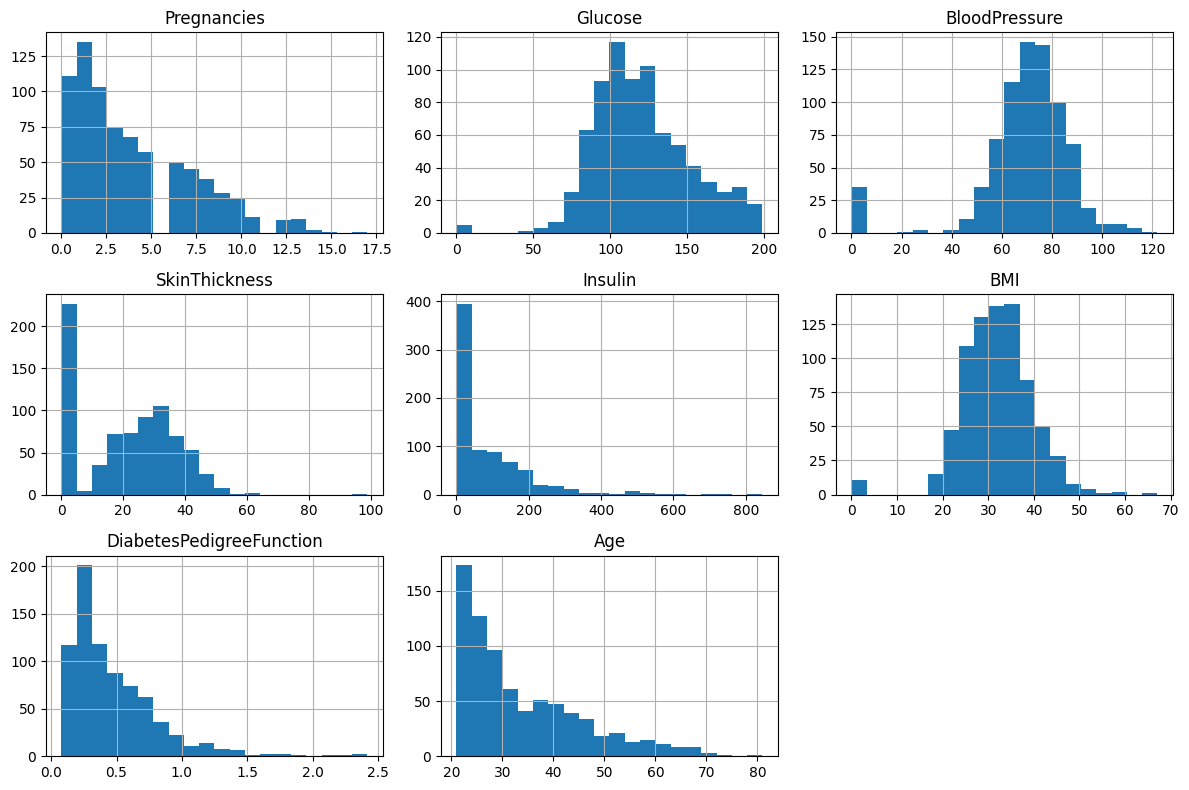

In [134]:
df[numeric_feature].hist(bins=20,figsize=(12,8))
plt.title('histrogram of numerical feature',fontsize=14)
plt.tight_layout()
plt.show()

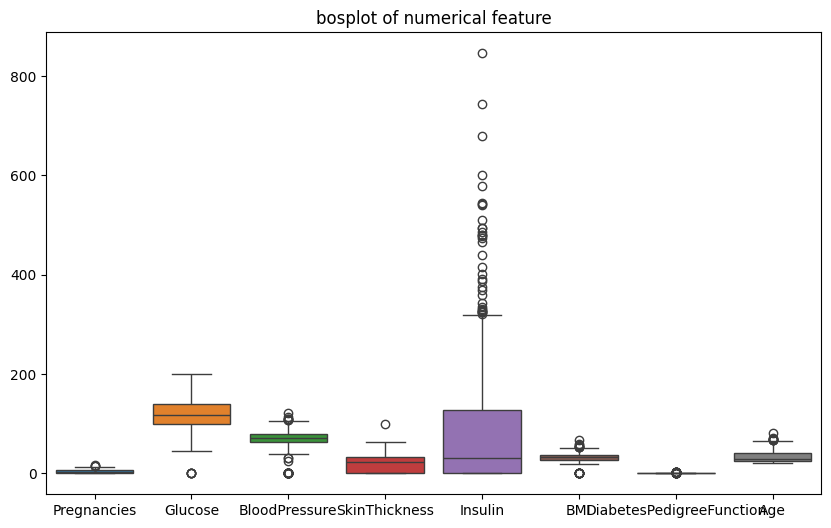

In [135]:
#see here is outliar is or not
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_feature])
plt.title('bosplot of numerical feature')
plt.show()

In [136]:
col1='Insulin'
q1=df[col1].quantile(0.25)
q3=df[col1].quantile(0.75)

IQR=q3-q1

lower=q1-1.5*IQR
upper=q3+1.5*IQR

outliers=df[(df[col1]<lower)|(df[col1]>upper)]
print(f"number of detected outliar is {col1}",len(outliers))

number of detected outliar is Insulin 34


In [137]:
col2='BloodPressure'
q1=df[col2].quantile(0.25)
q3=df[col2].quantile(0.75)

IQR=q3-q1

lower=q1-1.5*IQR
upper=q3+1.5*IQR

outliers2=df[(df[col2]<lower)|(df[col2]>upper)]
print(f"number of detected outliar is {col2}",len(outliers2))

number of detected outliar is BloodPressure 45


Text(0.5, 1.0, 'Insulin distribution')

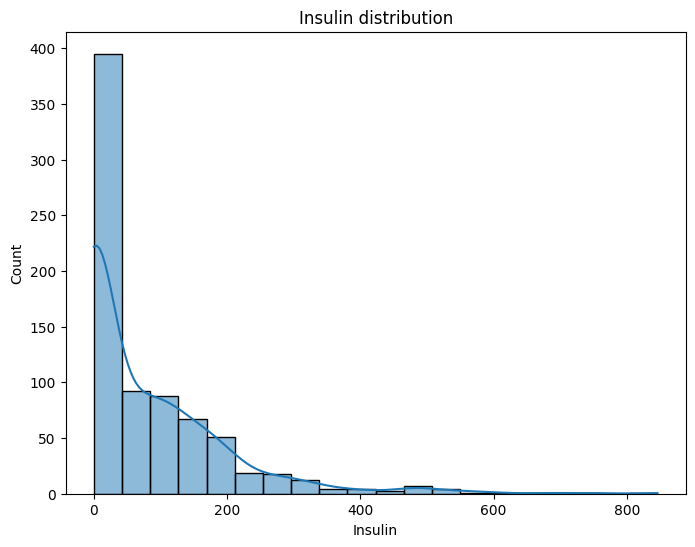

In [138]:
#plot ph
plt.figure(figsize=(8,6))
sns.histplot(df['Insulin'],kde=True,bins=20)
plt.title("Insulin distribution")

Text(0.5, 1.0, 'Glucose distribution')

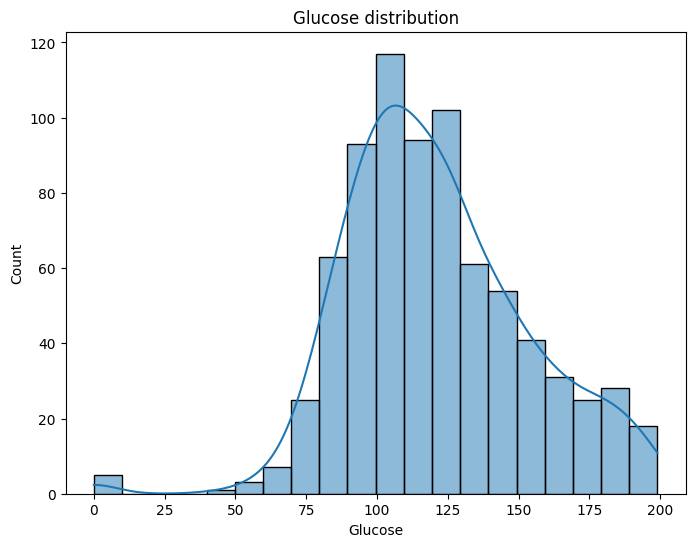

In [139]:
#plot ph
plt.figure(figsize=(8,6))
sns.histplot(df['Glucose'],kde=True,bins=20)
plt.title("Glucose distribution")

In [140]:
for col in x.columns:
    q1 = x[col].quantile(0.25)
    q3 = x[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    x[col] = x[col].clip(lower, upper)


# PipeLine

In [141]:
#for numerical feature

num_transformer=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('sacler',StandardScaler())
    ]
)

In [142]:
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('sacler', StandardScaler())])

In [143]:
#combine them

preprocessor=ColumnTransformer(
    transformers=[
        ("num",num_transformer,numeric_feature)
    ]
)

In [144]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('sacler', StandardScaler())]),
                                 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])

In [145]:
#train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [146]:
#base learner

lr=LogisticRegression( max_iter=2000,
    class_weight='balanced')
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
rf=RandomForestClassifier(max_depth= None, max_features= 'sqrt', n_estimators= 50 ,
    )
knn=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)
svm=SVC(kernel='rbf',gamma='scale',C=5,random_state=42)
gb=GradientBoostingClassifier( n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42)

In [147]:
# Voting classificatiom
voting_class=VotingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('rf',rf),
        ('knn',knn),
        ('svm',svm),
        ('gb',gb)
    ],
    voting='hard'

)

In [148]:
#stacking classification

stacking_class=StackingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('rf',rf),
        ('knn',knn),
        ('svm',svm),
        ('gb',gb)
    ],
    final_estimator=RidgeClassifier()

)


In [149]:
#model traing

model_to_train={
    'Logistic Regression' : lr,
    'Decision Tree' :dt,
    'Random Forest' : rf,
    'Knn' :knn,
    'SVM' :svm,
    'Gradient Boosting' :gb,
    'Voting classifier' :voting_class,
    'Stacking classifier' :stacking_class

}

In [150]:
# taring and evaluation

result=[]
for model_name,model in model_to_train.items():
  #create full pipe line with preprocessor
  pipe=Pipeline([
      ("preprocessor",preprocessor),
      ("model",model)
  ]

  )
  #train the model
  pipe.fit(x_train,y_train)
  #predict

  y_pred=pipe.predict(x_test)
  #evatute
  accuracy=accuracy_score(y_test,y_pred)

  result.append(
      {
          "Model" :model_name,
          "Accuracy" :accuracy
      }
  )
result_df=pd.DataFrame(result).sort_values(by="Accuracy",ascending=False)

print(result_df)



                 Model  Accuracy
6    Voting classifier  0.772727
2        Random Forest  0.766234
3                  Knn  0.759740
1        Decision Tree  0.759740
7  Stacking classifier  0.759740
5    Gradient Boosting  0.746753
4                  SVM  0.740260
0  Logistic Regression  0.681818


In [153]:
best_model=result_df.iloc[0]['Model']
best_model_score=model_to_train[best_model]

#fit the best model

final_pipe=Pipeline(
    [
        ("preprocessor",preprocessor),
        ("model",best_model_score)
    ]
)

final_pipe.fit(x_train,y_train)
y_final_pred=final_pipe.predict(x_test)
final_accuracy=accuracy_score(y_test,y_final_pred)


# Cross validation

model is Random forest best model

for this data set

In [154]:
rf_pipeline=Pipeline(
    [
        ("preprocessor",preprocessor),
        ('model',RandomForestClassifier(max_depth= None, max_features= 'sqrt', n_estimators= 50 ))
    ]
)

# 5 fold cross validation

In [158]:
cv_results=cross_val_score(rf_pipeline,
                        x_train,y_train,cv=5,scoring="accuracy")

cv_accuracy=cv_results.mean()
cv_std=cv_results.std()
cv_accuracy,cv_std,cv_results

(np.float64(0.7703585232573638),
 np.float64(0.02640720891245649),
 array([0.75609756, 0.82113821, 0.75609756, 0.74796748, 0.7704918 ]))

# Gride search cv

#random forest

In [160]:
rf_pipeline=Pipeline(
    [
        ("preprocessor",preprocessor),
        ('model',RandomForestClassifier(max_depth= None, max_features= 'sqrt', n_estimators= 50 ))
    ]
)

In [167]:
param_grid = {
    'model__n_estimators': [50, 75, 100],
    'model__max_depth': [None, 5, 10, 15],
    'model__max_features': ['sqrt', 'log2'],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [2, 3, 4]
}


In [168]:
grid_search_rf=GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [169]:
grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sacler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(n_estimators=50))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10, 15],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [2, 3, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 75, 100]},
             scoring='accuracy', verbose=2)

In [170]:
grid_search_rf.best_params_

{'model__max_depth': 5,
 'model__max_features': 'log2',
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 2,
 'model__n_estimators': 50}

In [171]:
grid_search_rf.best_score_

np.float64(0.7932160469145676)

# save model

In [172]:
import pickle

In [175]:
filename='random_forest_model.pkl'
with open(filename,'wb') as file:
  pickle.dump(grid_search_rf,file)

In [176]:
with open("/content/random_forest_model.pkl","rb") as file:
  rf_loaded_model=pickle.load(file)


In [177]:
rf_loaded_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])